In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 13,5

In [159]:
sales = pd.read_excel('proxima_sales.xls')
sales.columns=['year', 'month', 'brand', 'company', 'ATC1', 'ATC2', 'ATC3', 'ATC4', 'ATC5', 'sku', 'packs', 'rur', 'price']
sales['packs'] = sales.packs.astype('int64')
sales['rur'] = sales.rur.astype('int64')
sales

,year,month,brand,company,ATC1,ATC2,ATC3,ATC4,ATC5,sku,packs,rur,price
0,2016,1,ГУБКА ГЕМОСТАТИЧЕСКАЯ,"Белкозин-Лужский завод (Россия, Луга)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02B ВИТАМИН К И ДРУГИЕ ГЕМОСТАТИЧЕСКИЕ СРЕДСТВА,B02B C Гемостатические средства для местного п...,B02B C07 Коллаген,"ГУБКА ГЕМОСТАТИЧЕСКАЯ КОЛЛАГЕНОВАЯ, Белкозин-Л...",6781,1101454,162.410443
1,2016,1,ГУБКА ГЕМОСТАТИЧЕСКАЯ,"Белкозин-Лужский завод (Россия, Луга)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02B ВИТАМИН К И ДРУГИЕ ГЕМОСТАТИЧЕСКИЕ СРЕДСТВА,B02B C Гемостатические средства для местного п...,B02B C07 Коллаген,"ГУБКА ГЕМОСТАТИЧЕСКАЯ КОЛЛАГЕНОВАЯ, Белкозин-Л...",10437,964720,92.426297
2,2016,1,ГУБКА ГЕМОСТАТИЧЕСКАЯ,"Белкозин-Лужский завод (Россия, Луга)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02B ВИТАМИН К И ДРУГИЕ ГЕМОСТАТИЧЕСКИЕ СРЕДСТВА,B02B C Гемостатические средства для местного п...,B02B C07 Коллаген,"ГУБКА ГЕМОСТАТИЧЕСКАЯ КОЛЛАГЕНОВАЯ, Белкозин-Л...",458,80092,174.804749
3,2016,1,ГУБКА ГЕМОСТАТИЧЕСКАЯ,"Белкозин-Лужский завод (Россия, Луга)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02B ВИТАМИН К И ДРУГИЕ ГЕМОСТАТИЧЕСКИЕ СРЕДСТВА,B02B C Гемостатические средства для местного п...,B02B C07 Коллаген,"ГУБКА ГЕМОСТАТИЧЕСКАЯ КОЛЛАГЕНОВАЯ, Белкозин-Л...",22,36330,1583.006972
4,2016,1,АПРОТЕКС,"Верофарм (Россия, Москва)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A B Ингибиторы протеиназ,B02A B01 Апротинин,"АПРОТЕКС, Верофарм (Россия, Москва), лиофил. д...",29,12838,433.748986
5,2016,1,АПРОТЕКС,"Верофарм (Россия, Москва)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A B Ингибиторы протеиназ,B02A B01 Апротинин,"АПРОТЕКС, Верофарм (Россия, Москва), лиофил. д...",285,112789,395.613785
6,2016,1,АПРОТЕКС,"Верофарм (Россия, Москва)","B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A B Ингибиторы протеиназ,B02A B01 Апротинин,"АПРОТЕКС, Верофарм (Россия, Москва), р-р д/инф...",1316,396796,301.375378
7,2016,1,АМИНОКАПРОНОВАЯ КИСЛОТА,Биохимик (Россия),"B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A A Аминокислоты,B02A A01 Кислота аминокапроновая,"АМИНОКАПРОНОВАЯ КИСЛОТА, Биохимик (Россия), р-...",63,174201,2751.997946
8,2016,1,АМИНОКАПРОНОВАЯ КИСЛОТА,Биохимик (Россия),"B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A A Аминокислоты,B02A A01 Кислота аминокапроновая,"АМИНОКАПРОНОВАЯ КИСЛОТА, Биохимик (Россия), р-...",7,460,63.814404
9,2016,1,АМИНОКАПРОНОВАЯ КИСЛОТА,Биохимик (Россия),"B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ",B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,B02A ИНГИБИТОРЫ ФИБРИНОЛИЗА,B02A A Аминокислоты,B02A A01 Кислота аминокапроновая,"АМИНОКАПРОНОВАЯ КИСЛОТА, Биохимик (Россия), р-...",5120,273092,53.331390


In [233]:
sales_atc2 = sales.filter(items = ['year', 'ATC2', 'packs', 'rur'])
sales_atc2_barh = sales_atc2.groupby('ATC2').sum().sort_values('rur', ascending=True).reset_index()
sales_atc2_barh

,ATC2,year,packs,rur
0,B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА,14334048,28888414,6712533837
1,B05 КРОВЕЗАМЕНИТЕЛИ И ПЕРФУЗИОННЫЕ РАСТВОРЫ,57588027,142749653,7830014340
2,B06 ПРОЧИЕ ГЕМАТОЛОГИЧЕСКИЕ СРЕДСТВА,1609938,22672924,19310525909
3,B03 АНТИАНЕМИЧЕСКИЕ СРЕДСТВА,9397467,149414352,20180542520
4,B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА,18277054,219802381,92952838632


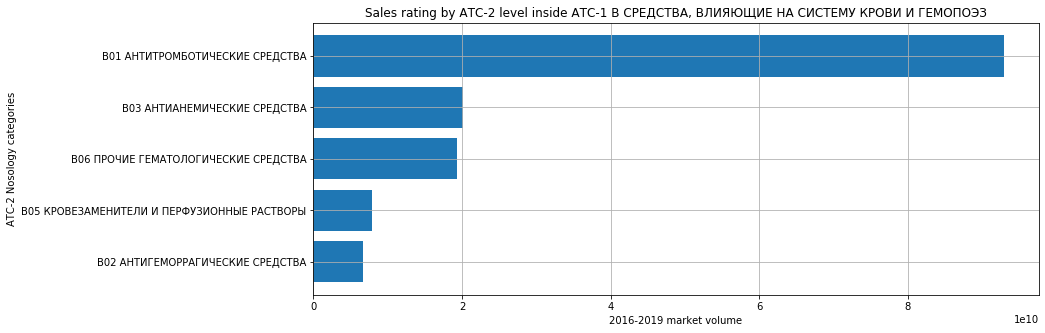

In [240]:
plt.barh(sales_atc2_barh['ATC2'], sales_atc2_barh['rur'])
plt.xlabel('2016-2019 market volume')
plt.ylabel('ATC-2 Nosology categories')
plt.title('Sales rating by ATC-2 level inside ATC-1 B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ')
plt.grid()

In [225]:
dynamic_sales = sales.groupby(['year','month', 'ATC2']).sum()
dynamic_sales = dynamic_sales.filter(items=['year', 'ATC2', 'rur'])
dynamic_sales.head()

rur
year month ATC2                                                   
2016 1     B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА              1432274087
           B02 АНТИГЕМОРРАГИЧЕСКИЕ СРЕДСТВА              116257500
           B03 АНТИАНЕМИЧЕСКИЕ СРЕДСТВА                  324323426
           B05 КРОВЕЗАМЕНИТЕЛИ И ПЕРФУЗИОННЫЕ РАСТВОРЫ   146008189
           B06 ПРОЧИЕ ГЕМАТОЛОГИЧЕСКИЕ СРЕДСТВА          347629020

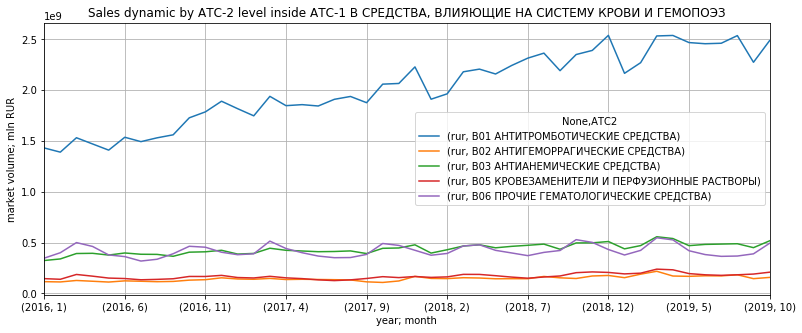

In [242]:
dynamic_sales.unstack('ATC2').plot()
plt.xlabel('year; month')
plt.ylabel('market volume; mln RUR')
plt.title('Sales dynamic by ATC-2 level inside ATC-1 B СРЕДСТВА, ВЛИЯЮЩИЕ НА СИСТЕМУ КРОВИ И ГЕМОПОЭЗ')
plt.grid()

In [299]:
B01_dynamic_sales_by_brands = sales[ (sales['ATC2']=='B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА') ]
B01_dynamic_sales_by_brands = B01_dynamic_sales_by_brands.groupby(['brand']).sum().sort_values('rur', ascending=False).head(5)
# B01_dynamic_sales_by_brands.groupby(['brand']).sum()
B01_dynamic_sales_by_brands

,year,month,packs,rur,price
brand,,,,,
КСАРЕЛТО,1121726,3472,5936818,19048773936,2.287660e+06
КАРДИОМАГНИЛ,371208,1156,81396484,18579037951,4.353365e+04
ПРАДАКСА,829152,2577,3174050,9401116288,1.312558e+06
ЭЛИКВИС,371208,1156,4473541,8377342871,3.094230e+05
ТРОМБО АСС,556812,1734,53683841,4553202960,2.421513e+04


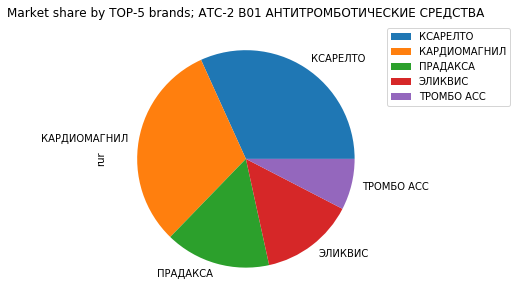

In [353]:
B01_dynamic_sales_by_brands.plot(kind='pie', y='rur')
plt.title('Market share by TOP-5 brands; ATC-2 B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА')
plt.legend(bbox_to_anchor=(1,1))

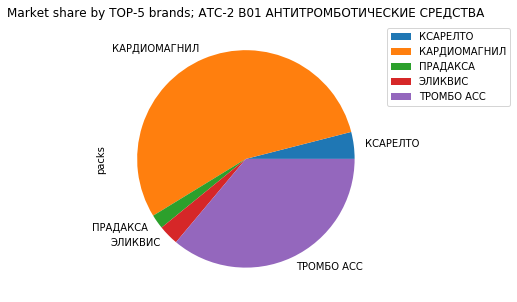

In [336]:
B01_dynamic_sales_by_brands.plot(kind='pie', y='packs')
plt.title('Market share by TOP-5 brands; ATC-2 B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА')
plt.legend(bbox_to_anchor=(1, 1))

In [491]:
brands_analysis = sales[ (sales['ATC2']=='B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА') ]
brands_analysis = brands_analysis.filter(items=['brand', 'sku'])
brands_analysis = brands_analysis.groupby(['brand', 'sku']).count().reset_index()
brands_analysis = brands_analysis.groupby('brand').count()
brands_analysis.head()

,sku
brand,
АГРЕГАЛЬ,1
АГРЕНОКС,2
АДУЦИЛ,2
АКТИЛИЗЕ,1
АНГИОКС,1


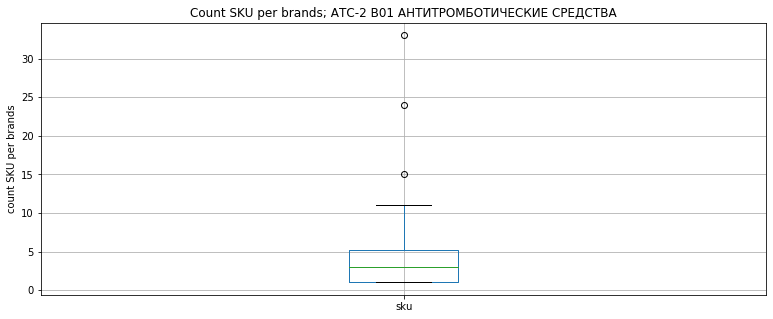

In [496]:
brands_analysis['sku'].plot(kind='box')
plt.ylabel('count SKU per brands')
# plt.xlabel('market volume; mln RUR')
plt.title('Count SKU per brands; ATC-2 B01 АНТИТРОМБОТИЧЕСКИЕ СРЕДСТВА')
plt.grid()